In [60]:
%matplotlib notebook
import serial

import numpy as np
import sys
from matplotlib import pyplot as plt

<IPython.core.display.Javascript object>


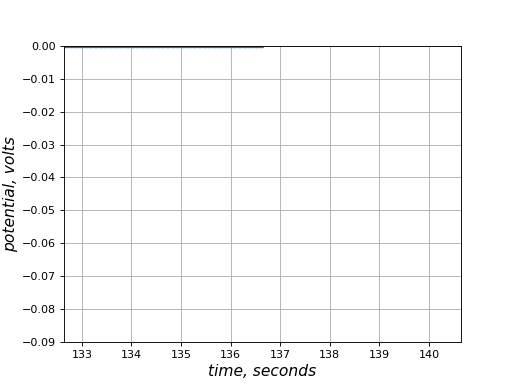

In [61]:
plt.ion() 
fig1 = plt.figure()
start_time = 0
timepoints = []
ydata = []
yrange = [-0.09,-0.00]
view_time = 4 # seconds of data to view at once
duration = 24000 # total seconds to collect data
#fig1 = plt.figure()
#fig1.suptitle('live updated data', fontsize='18', fontweight='bold')
plt.xlabel('time, seconds', fontsize='14', fontstyle='italic')
plt.ylabel('potential, volts', fontsize='14', fontstyle='italic')
plt.axes().grid(True)
line1, = plt.plot(ydata,marker='o',markersize=2,markerfacecolor='red')
plt.ylim(yrange)
plt.xlim([0,view_time])
line1.set_xdata(timepoints)
line1.set_ydata(ydata)

In [ ]:
with open('radio_sun.log', 'r') as sun:
    data = True
    while data:
        data = sun.readline()
        inputs = data.split()
        t = float(inputs[0])
        v = float(inputs[1])
        #print(t,v)
        ydata.append(v)
        timepoints.append(t)
        #print(ydata,timepoints)
        current_time = t
        #line1, = plt.plot(ydata,marker='o',markersize=4,markerfacecolor='red')
        line1.set_xdata(timepoints)
        line1.set_ydata(ydata)
        # slide the viewing frame along
        if current_time > view_time:
            plt.xlim([current_time-view_time,current_time+view_time])
        fig1.canvas.draw()
        